In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags


In [2]:

def Poisson_mixed_backward(n,beta,gamma,a,b,u_x,u_d_x,f_x):
    
    u_0=u_x(0)
    u_1=u_x(1)
    h=1/(n+1)

    c=a*u_x(1)+b*u_d_x(1)

    index=np.array(list(range(0,n)))/n

    index=index[1:n]
    index_plus=(np.array(list(range(0,n)))+0.5)/n

    index_plus=index_plus[1:n]

    index_minus=((np.array(list(range(0,n)))-0.5)/n)

    index_minus=index_minus[1:n]

    e=np.ones(n-1)

    minus_1_diag=-beta(index_minus)*e
    plus_1_diag=-beta(index_plus)*e
    diag=(beta(index_plus)+beta(index_minus))-gamma(index)*h**2

    A=np.zeros((n-1,n-1))

    for i in range(0,n-2):
        A[i,i]=diag[i]
        if not i==n-2:
            A[i,i+1]=plus_1_diag[i]
        if not i==0:
            A[i,i-1]=minus_1_diag[i]    
    
    A[-1,-1]=1.5*a/h+b
    A[-1,-2]=-2*a/h
    A[-1,-3]=0.5*a/h
    
    f= f_x(index) * h**2
    f[0]=f[0]+(u_0*beta(index_minus[0]))
    f[-1]=c
    u=np.linalg.solve(A,f)
    
    return u


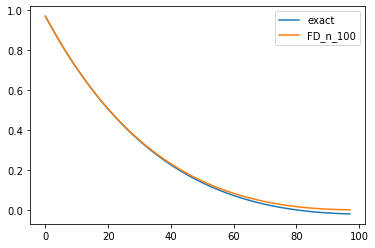

In [3]:
n=100
beta=lambda x:1+x**2
gamma=lambda x:x
u_x=lambda x: np.exp(-x)*(x-1)**2
#needed to compute c!
u_d_x=lambda x: np.exp(-x)*(x**2-4*x+3)
f_x=lambda x:-np.exp(-x)*(x**4-7*x**3+14*x**2-11*x+7)


a=2
b=-3
index=np.array(list(range(0,n)))/n

u=Poisson_mixed_backward(n,beta,gamma,a,b,u_x,u_d_x,f_x)
plt.plot(u[:-1])
plt.plot(u_x(index[1:-1]))
plt.legend(["exact","FD_n_100"])
plt.show()

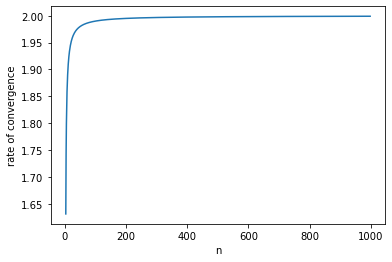

In [4]:

def norm_array(sol,exact):
    
    return np.sqrt(np.linalg.norm(sol-exact))/len(sol)
error=[]
#4 points becouse 3 points are needed for the 3 backwards aproximation 
for n in range(4,1000):
    index=np.array(list(range(0,n)))/n
    u=Poisson_mixed_backward(n,beta,gamma,a,b,u_x,u_d_x,f_x)[:-1]
    u_exact=u_x(index[1:-1])
    error.append(norm_array(u,u_exact))

error=np.array(error)
error=np.log(error[2:]/error[:-2])/np.log(error[1:-1]/error[0:-2])
plt.plot(np.arange(4,998),error)
plt.xlabel("n")
plt.ylabel("rate of convergence")
plt.show()
    